# Import Libraries

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from functools import reduce
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import spearmanr
import statsmodels.api as sm
from pylab import rcParams
from matplotlib.backends.backend_agg import FigureCanvasAgg
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

plt.style.use('seaborn-darkgrid')

In [2]:
psSalary = pd.read_csv('COVID_PSchSalary.csv',index_col = 0)
psSalary.head()

,State,cases,deaths,Public School Salary 2018(Dollars)
0,Alabama,387786,14345,50568.0
1,Alaska,18316,367,69682.0
2,Arizona,426614,18857,48723.0
3,Arkansas,161569,3301,50544.0
4,California,2664110,102387,80680.0


In [3]:
psSalary = psSalary.drop(columns = ['cases', 'deaths'])
psSalary.head()

,State,Public School Salary 2018(Dollars)
0,Alabama,50568.0
1,Alaska,69682.0
2,Arizona,48723.0
3,Arkansas,50544.0
4,California,80680.0


In [4]:
COVID = pd.read_csv('COVID.csv', index_col = 0)
COVID.head()

,State,cases,deaths
0,Alabama,26912,785
1,Alaska,751,10
2,Arizona,39298,1228
3,Arkansas,13191,188
4,California,159098,5202


In [5]:
psSalary = pd.merge(psSalary, COVID, how = 'left', on = 'State')
psSalary.head()

,State,Public School Salary 2018(Dollars),cases,deaths
0,Alabama,50568.0,26912,785
1,Alaska,69682.0,751,10
2,Arizona,48723.0,39298,1228
3,Arkansas,50544.0,13191,188
4,California,80680.0,159098,5202


In [6]:
psSalary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   State                               51 non-null     object 
 1   Public School Salary 2018(Dollars)  51 non-null     float64
 2   cases                               51 non-null     int64  
 3   deaths                              51 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [7]:
psSalary.isnull().sum()

State                                 0
Public School Salary 2018(Dollars)    0
cases                                 0
deaths                                0
dtype: int64

In [8]:
psSalary.describe()

,Public School Salary 2018(Dollars),cases,deaths
count,51.000000,51.000000,51.000000
mean,57313.039216,41994.235294,2290.549020
std,9795.914601,63513.183767,4748.588326
min,44926.000000,614.000000,10.000000
25%,50451.500000,9231.500000,212.000000
50%,53815.000000,20152.000000,704.000000
75%,61853.000000,46961.500000,2469.500000
max,84227.000000,389349.000000,30683.000000


In [9]:
Pcorr = psSalary.corr(method = 'pearson')
Pcorr

,Public School Salary 2018(Dollars),cases,deaths
Public School Salary 2018(Dollars),1.000000,0.590862,0.601236
cases,0.590862,1.000000,0.957358
deaths,0.601236,0.957358,1.000000


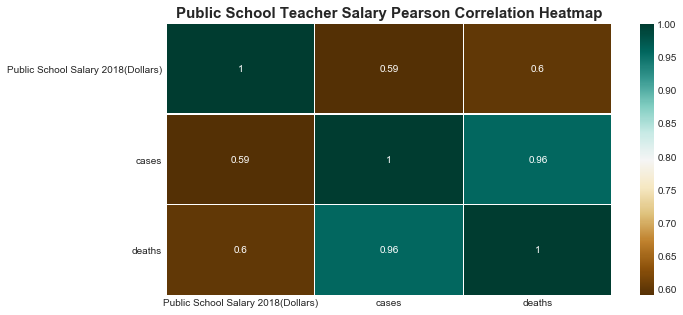

In [10]:
plt.figure(figsize = (10,5))
sns.heatmap(Pcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Public School Teacher Salary Pearson Correlation Heatmap', fontweight = 'bold', fontsize = 15);

In [11]:
Kcorr = psSalary.corr(method = 'kendall')
Kcorr

,Public School Salary 2018(Dollars),cases,deaths
Public School Salary 2018(Dollars),1.000000,0.200000,0.232248
cases,0.200000,1.000000,0.823853
deaths,0.232248,0.823853,1.000000


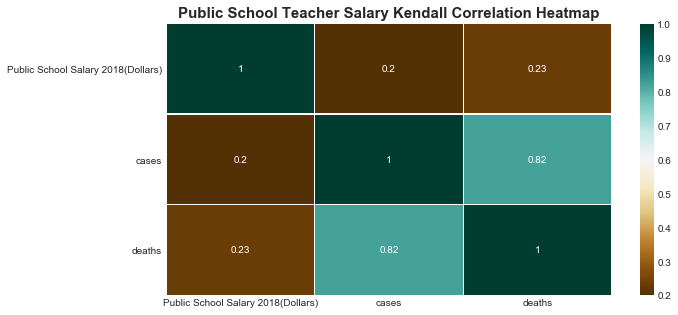

In [12]:
plt.figure(figsize = (10,5))
sns.heatmap(Kcorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Public School Teacher Salary Kendall Correlation Heatmap', fontweight = 'bold', fontsize = 15);

In [13]:
Scorr = psSalary.corr(method = 'spearman')
Scorr

,Public School Salary 2018(Dollars),cases,deaths
Public School Salary 2018(Dollars),1.000000,0.266968,0.322179
cases,0.266968,1.000000,0.953189
deaths,0.322179,0.953189,1.000000


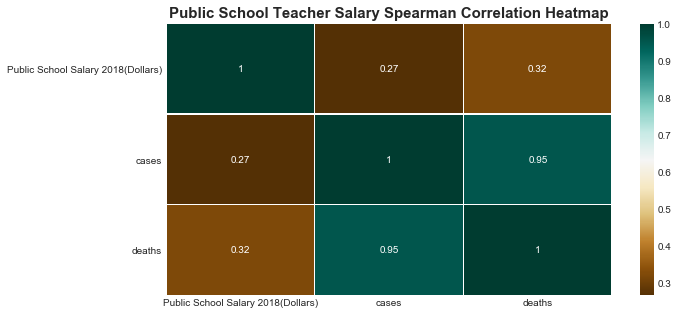

In [14]:
plt.figure(figsize = (10,5))
sns.heatmap(Scorr, cmap = 'BrBG', annot = True, linewidths = 0.5)
plt.title('Public School Teacher Salary Spearman Correlation Heatmap', fontweight = 'bold', fontsize = 15);

In [15]:
AllCorr = pd.DataFrame(Pcorr.index, columns = ['Public School Teacher Salary'])

AllCorr['Pearson Correlation'] = list(Pcorr.cases)
AllCorr['Kendall Correlation'] = list(Kcorr.cases)
AllCorr['Spearman Correlation'] = list(Scorr.cases)

AllCorr = AllCorr.drop([1, 2])

AllCorr

,Public School Teacher Salary,Pearson Correlation,Kendall Correlation,Spearman Correlation
0,Public School Salary 2018(Dollars),0.590862,0.2,0.266968


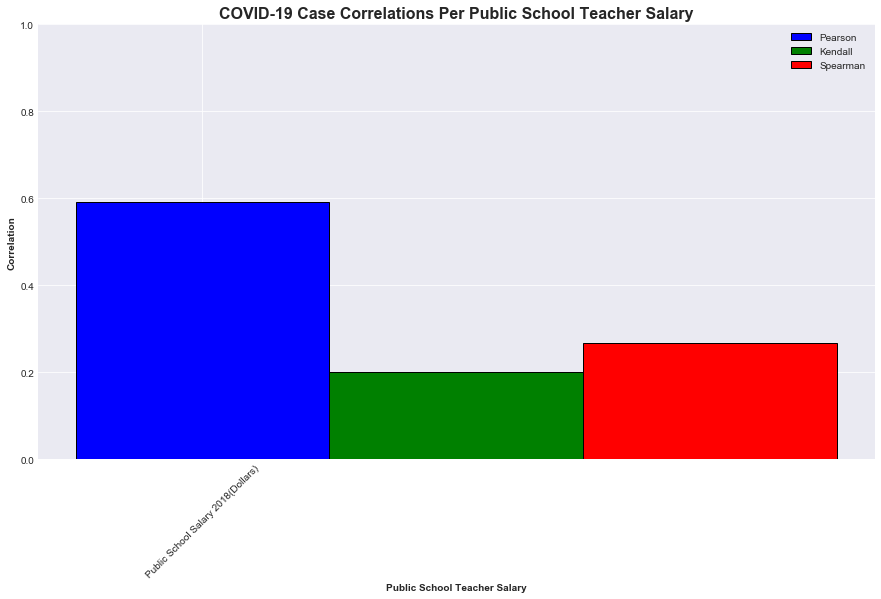

In [16]:
fig = plt.figure(figsize = (15,8))

X = list(AllCorr['Public School Teacher Salary'])
PearCorr = list(AllCorr['Pearson Correlation'])
KendCorr = list(AllCorr['Kendall Correlation'])
SpeaCorr = list(AllCorr['Spearman Correlation'])

_X = np.arange(len(X))

plt.bar(_X, PearCorr, 0.25, color = 'blue', edgecolor = 'black')
plt.bar(_X + 0.25, KendCorr, 0.25, color = 'green', edgecolor = 'black')
plt.bar(_X + 0.50, SpeaCorr, 0.25, color = 'red', edgecolor = 'black')

plt.title('COVID-19 Case Correlations Per Public School Teacher Salary', fontsize = 16, fontweight = 'bold')

plt.xlabel('Public School Teacher Salary', fontsize = 10, fontweight = 'bold')
plt.xticks(_X, X)
plt.xticks(rotation = 45)

plt.ylabel('Correlation', fontsize = 10, fontweight = 'bold')
plt.yticks(np.arange(0, 1.2, step = 0.2))

plt.legend(['Pearson', 'Kendall', 'Spearman'])

plt.show();

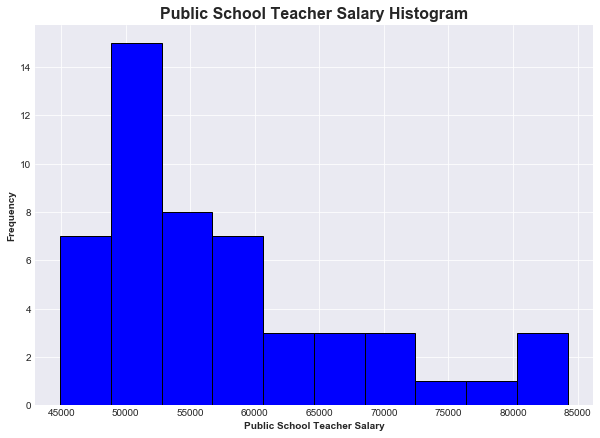

In [17]:
plt.style.use('seaborn-darkgrid')

psSalary['Public School Salary 2018(Dollars)'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', figsize = (10,7))
plt.title('Public School Teacher Salary Histogram', fontsize = 16, fontweight = 'bold')
plt.xlabel('Public School Teacher Salary', fontsize = 10, fontweight = 'bold')
plt.ylabel('Frequency', fontsize = 10, fontweight = 'bold');

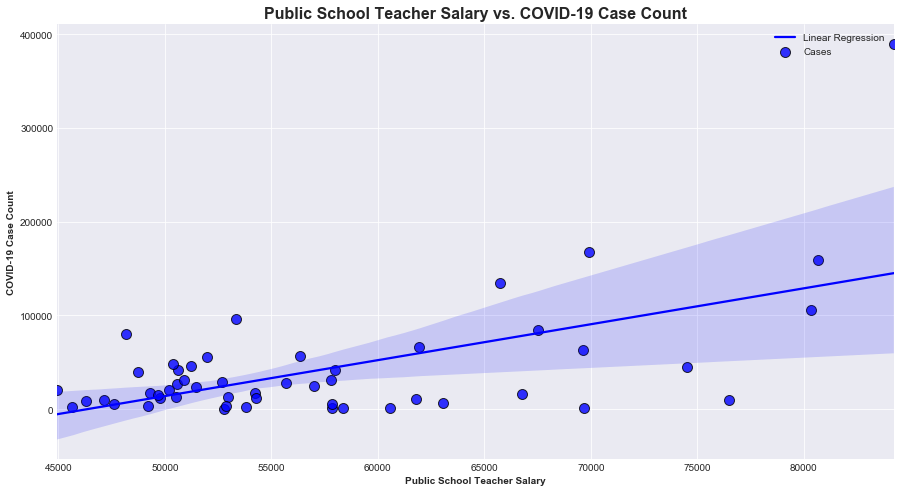

In [18]:
fig = plt.figure(figsize = (15,8))

sns.regplot(x = 'Public School Salary 2018(Dollars)', y = 'cases', data = psSalary, color = 'b', scatter_kws = {'linewidths':1, 'edgecolor':'k', 's':100})

plt.title('Public School Teacher Salary vs. COVID-19 Case Count', fontsize = 16, fontweight = 'bold')
plt.xlabel('Public School Teacher Salary', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Linear Regression', 'Cases'])

plt.show();

# Spaerman Correlation

In [19]:
spearmanr(psSalary['cases'], psSalary['Public School Salary 2018(Dollars)'])

SpearmanrResult(correlation=0.2669683257918552, pvalue=0.05825142720518073)

# OLS Regression

In [20]:
model1 = sm.OLS(psSalary['cases'], psSalary['Public School Salary 2018(Dollars)']).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  cases   R-squared (uncentered):                   0.396
Model:                            OLS   Adj. R-squared (uncentered):              0.384
Method:                 Least Squares   F-statistic:                              32.83
Date:                Thu, 02 Jul 2020   Prob (F-statistic):                    5.75e-07
Time:                        00:32:10   Log-Likelihood:                         -632.40
No. Observations:                  51   AIC:                                      1267.
Df Residuals:                      50   BIC:                                      1269.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Public School Salary 2018(Dollars)     0.8190      0.143      5.729      0.000       0.532       1.106
==============================================================================
Omnibus:                       69.659   Durbin-Watson:                   2.111
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              677.440
Skew:                           3.608   Prob(JB):                    7.87e-148
Kurtosis:                      19.332   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

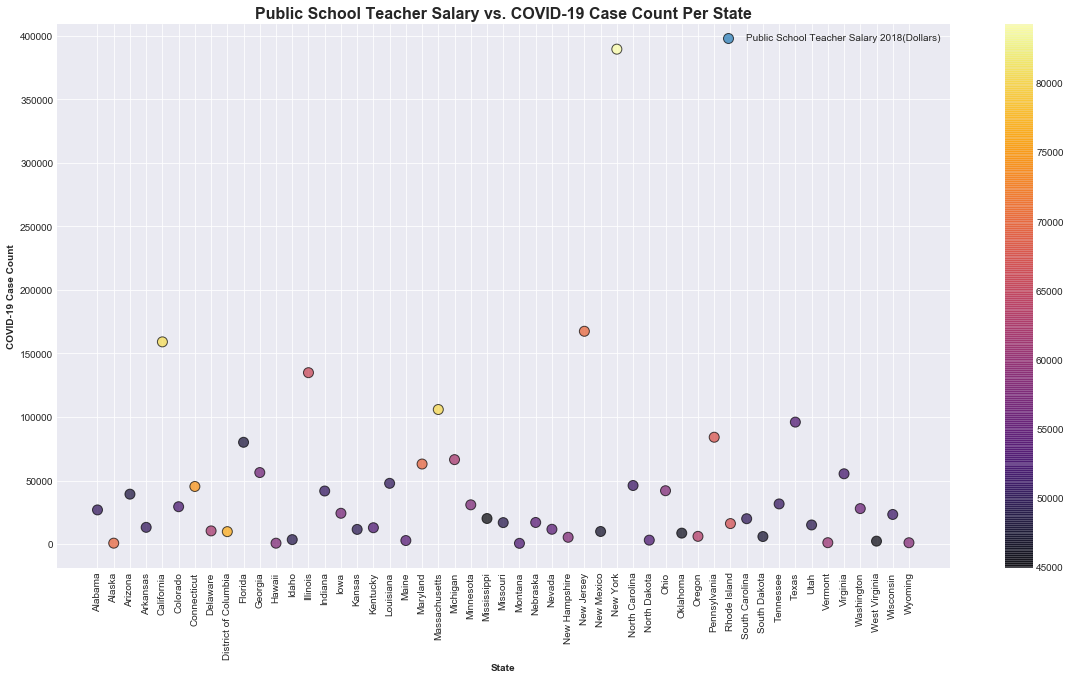

In [21]:
plt.style.use('seaborn-darkgrid')
fig = plt.figure(figsize = (20,10))

x = psSalary['State'] 
y = psSalary['cases']

plt.scatter(x, y, linewidths = 1, alpha = 0.7, edgecolor = 'k', s = 100, c = psSalary['Public School Salary 2018(Dollars)'], cmap = 'inferno')
plt.title('Public School Teacher Salary vs. COVID-19 Case Count Per State', fontsize = 16, fontweight = 'bold')
plt.xlabel('State', fontsize = 10, fontweight = 'bold')
plt.ylabel('COVID-19 Case Count', fontsize = 10, fontweight = 'bold')

plt.legend(['Public School Teacher Salary 2018(Dollars)'])

plt.xticks(rotation = 90)

plt.colorbar()
plt.show();